<div style="text-align:center;">
    <img src="http://www.cs.wm.edu/~rml/images/wm_horizontal_single_line_full_color.png">
    <h1>CSCI 416-01/516-01, Fall 2024</h1>
    <h1>Building a regressor for the 2016 presidential election</h1>
</div>    

# Contents
* [The problem](#The-problem)
* [The data](#The-data)
* [To do](#To-do)
* [What to submit](#What-to-submit)

# The problem

Can you build a reasonably accurate regressor to predict the vote totals for each party in each county?

# The data

This is the same data set as for the classification problem.  The only difference is that rather than having class labels we have vote totals for each party (columns 0 and 1).

# Read the data



In [3]:
# Read the data.

import pandas as pd
import numpy  as np

df = pd.read_csv('vote16_regression.csv')

y = df.iloc[:,:2]
X = df.iloc[:,2:]

In [4]:
y.head()

,dem,gop
0,1688,2819
1,1243,7054
2,17156,36342
3,84,715
4,1491,3025


In [7]:
X.head()

,dem,gop,state_abbr,total_votes_2012,votes_gop_2012,Obama,Romney,PST045214,PST040210,PST120214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,1688,2819,IA,4804,2373,0.493131,0.493963,9200,9337,-1.5,...,0.0,23.1,0,144862,87923,9258,3859,6,569.57,16.4
1,1243,7054,GA,7757,6112,0.193245,0.787933,22264,22084,0.8,...,0.0,25.3,430397,107788,315062,14431,22760,2,261.50,84.5
2,17156,36342,NC,50353,31695,0.359760,0.629456,187589,177772,5.5,...,0.0,29.0,253035,96946,1913882,11698,287943,1081,762.74,233.1
3,84,715,TX,813,700,0.134071,0.861009,1608,1641,-2.0,...,0.0,0.0,0,3416,6813,4195,0,0,912.55,1.8
4,1491,3025,KS,4955,3495,0.281130,0.705348,23465,22952,2.2,...,0.0,19.2,0,197478,314598,13898,32249,62,639.50,35.9


# To do

Describe what you tried, and how you settled on a regressor.

Build estimators two ways:
1. Build separate regressors for the two parties.
2. Build a single regressor for both parties jointly.

How do the two approaches compare with regards to accuracy?


You can choose among the following classes of regressors:
* [Regression trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)
* [Linear least squares](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* [LASSO](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)
* [Ridge regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)
* Boosted regressors, e.g., 
    * [AdaBoost regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html)
* [Support vector regressor](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)

Choosing A Regressor: Does the Data have multicollinearity? Answering this can help pinpoint which kind of regressors would work well for this dataset. (Regressor Model for 'votes_dem_2012')

According to theory, RidgeRegression and LASSO are ideal targets to cooperate with multicollinearity and to achieve viable results for the regrsesion problem. 

              feature           VIF
0                 gop    184.593664
1    total_votes_2012  72013.715517
2      votes_dem_2012  28029.107180
3      votes_gop_2012  12175.458267
4               Obama   6117.152971
..                ...           ...
101     state_abbr_VT      1.498452
102     state_abbr_WA      2.294035
103     state_abbr_WI      3.181478
104     state_abbr_WV      2.136172
105     state_abbr_WY      1.925324

[106 rows x 2 columns]
LASSO Results
Root Mean Squared Error: 40721.50556247013
R-squared: 0.5915318546003112


C:\Users\Sammy Martinez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.587e+09, tolerance: 1.011e+09
  model = cd_fast.enet_coordinate_descent(


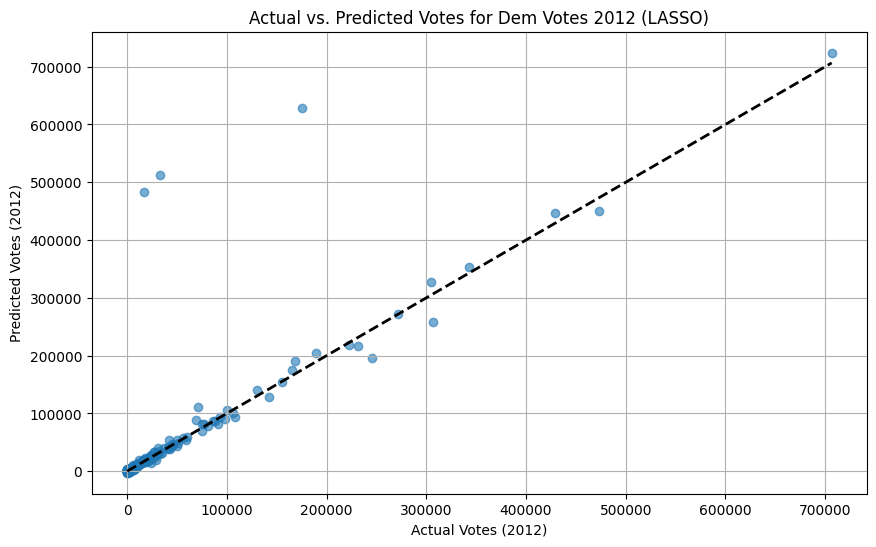

RIDGE Results
Root Mean Squared Error: 41295.433126391865
R-squared: 0.5799368432332104
LASSO Coefficients: [ 1.08112613e+04  5.45015965e+04  3.80735567e+04 -3.32085491e+04
  4.23749485e+02  1.18745423e+03  1.85928320e+04 -1.18543373e+04
 -3.18443137e+02 -6.84267631e+02 -5.56805316e+01  2.91009089e+02
  3.97646134e+02 -1.67297533e+02 -1.22250342e+04 -2.60105400e+03
 -1.36080097e+03  8.47501775e+02 -1.18043541e+01 -5.70974304e+02
  7.85822947e+03  1.11735274e+04 -1.65145403e+02 -7.36141912e+02
  1.72771727e+02 -8.35550912e+01  3.66341174e+01 -5.03838597e+03
 -1.88072583e+02  9.03204507e+03 -1.07787320e+02 -8.67729678e+02
  1.24434943e+03 -2.70171143e+04 -1.71612060e+02  2.79643164e+02
  1.41430731e+02  3.65845535e+02 -2.12272972e+04  1.00840538e+04
 -4.90672074e+01 -1.24386269e+02  2.11889323e+04 -1.57780461e+02
  1.42153725e+02  7.97453766e+02  1.14058397e+03  5.11279037e+02
 -1.97429070e+02  3.40053590e+02 -3.62846013e+02  1.33994642e+04
 -3.14110798e+02 -1.30851184e+03  1.67720657e+0

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import statsmodels.api as sm

#Load the data
data = pd.read_csv('vote16_regression.csv')

# Define target and features
#'votes_dem_2012 vs Dem
y = data['dem']
X = data.drop(columns=['dem'])  # Features
#y = data['dem']  # Target 

# Handle missing values
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# One-hot encoding for state_abbr
X_encoded = pd.get_dummies(X, columns=['state_abbr'], drop_first=True)
bool_columns = X_encoded.select_dtypes(include=[bool]).columns
X_encoded[bool_columns] = X_encoded[bool_columns].astype(int)


vif_data = pd.DataFrame()
vif_data["feature"] = X_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(X_encoded.values, i) for i in range(X_encoded.shape[1])]
print(vif_data)


# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#scale 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Only transform on test data

# Train model: alpha is 0.1
lasso = Lasso(alpha=0.1, max_iter=10000)
ridge = Ridge(alpha = 0.1, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled,y_train)
# predict
y_pred = lasso.predict(X_test_scaled)

# evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("LASSO Results")
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Votes for Dem Votes 2012 (LASSO)')
plt.xlabel('Actual Votes (2012)')
plt.ylabel('Predicted Votes (2012)')
plt.grid()
plt.show()
y_pred = ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RIDGE Results")
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')



print('LASSO Coefficients:', lasso.coef_)
lasso_coef = lasso.coef_
# Create a DataFrame with feature names and their coefficients
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lasso_coef})


non_zero_coef_df = coef_df[coef_df['Coefficient'] != 0]

# Print the non-zero coefficients with their feature names
print("Lasso Coefficients:")
print(non_zero_coef_df.sort_values(by='Coefficient', ascending=False))



From the Above Results, high VIF(Variance Inflation Factor) indicates that multicollinearities exist in this dataset. Therefore, LASSO or RidgeRegression would be suitable models. LASSO would potentially zero out coefficients, and RidgeRegression would lower the weights but still keep certain features available for use in the regression model. This information makes sense, however, despite the theory sounding good on paper, my results were horrible for the 'dem' column. I decided to try other regressors to see what stuck.

Mean Squared Error: 353463481.6
R² Score: 0.9129326970773378
Root Mean Squared Error: 18800.62450026594


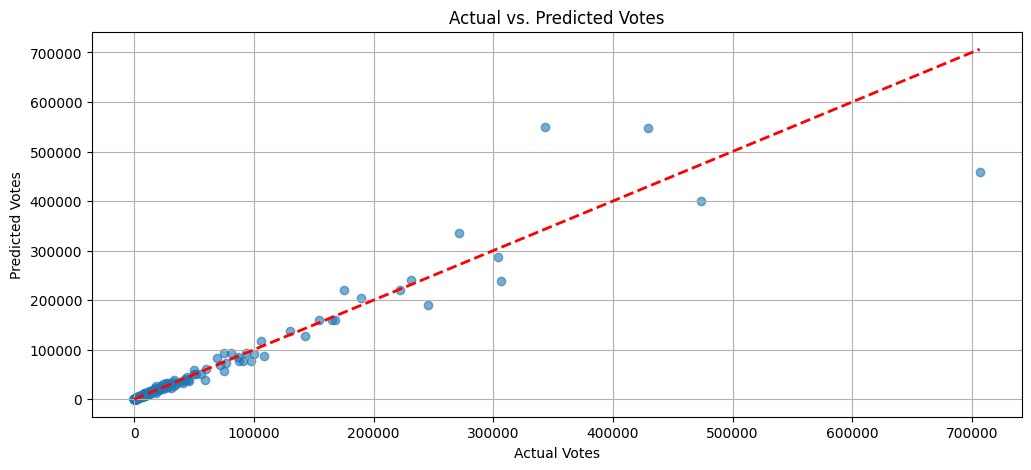

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLasso, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt

# Custom Preprocessor Class
class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.numeric_features = None
        self.categorical_features = None
        self.preprocessor = None

    def fit(self, X, y=None):
        # Identify numeric and categorical features
        self.numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        self.categorical_features = ['state_abbr']  # Modify if there are more categorical features

        #Define the transformers for preprocessing
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('fill_numeric_empty_data', SimpleImputer(strategy='mean'), self.numeric_features),
                ('categorical_feature_OneHotEncoding', OneHotEncoder(drop=None, handle_unknown='ignore'), self.categorical_features)
            ]
        )
        
        
        self.preprocessor.fit(X)
        return self

    def transform(self, X):
        return self.preprocessor.transform(X)

# Load the data
data = pd.read_csv('vote16_regression.csv')

# Choose features and target
X = data.drop(columns=['dem'])
y = data['dem']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', CustomPreprocessor()),
    ('scaler', StandardScaler()),
    #('model', MultiTaskLasso(alpha=0.1, max_iter=10000))
    #Decision Tree works EXTREMELY WELL, random_state = 42
    #LinearRegression does not work well
    ('model', DecisionTreeRegressor(random_state=42))
    #alpha = 0.1, max_iter = 10,000
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model 
mse_dem = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_dem}')
r2_dem = r2_score(y_test, y_pred)
print(f'R² Score: {r2_dem}')
rmse_dem = np.sqrt(mse_dem)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse_dem}') 
# Visualize predictions vs actual values
plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Votes')
plt.xlabel('Actual Votes')
plt.ylabel('Predicted Votes')
plt.grid()
plt.show()



The results of the DecisionTreeRegressor far surprass the LASSO and RidgeRegression results. Why might this be? Conceptually, the DecisionTree regressor gives the hands down best results because it may not be so adamant about linearization. A decision tree regressor is built similarly to a decision tree classifier, and tries to use to capture non-linear relationships through splits in the tree based on entropy(gini-index). 

I think that using other regressors like LASSO or RidgeRegression are not out of the question if the goal was to pinpoint the most important features for a prediction, but for pure predictive power, decisionTree Regressor works very well for this dataset. Moving forward, I will continue to use the Decision Tree. 

The Results look good. Let's see how the GOP Results Look:

Mean Squared Error: 65222734.705
R² Score: 0.9649084385733859
Root Mean Squared Error: 8076.059354970096


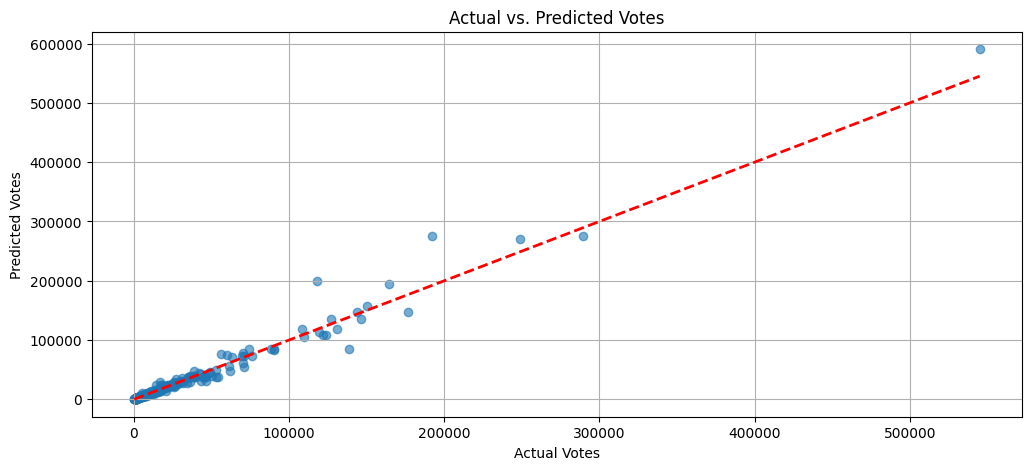

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLasso, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt

# Custom Preprocessor Class
class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.numeric_features = None
        self.categorical_features = None
        self.preprocessor = None

    def fit(self, X, y=None):
        # Identify numeric and categorical features
        self.numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        self.categorical_features = ['state_abbr']  # Modify if there are more categorical features

        #Define transformers
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('fill_numeric_empty_data', SimpleImputer(strategy='mean'), self.numeric_features),
                ('categorical_feature_OneHotEncoding', OneHotEncoder(drop=None, handle_unknown='ignore'), self.categorical_features)
            ]
        )
        
        
        self.preprocessor.fit(X)
        return self

    def transform(self, X):
        return self.preprocessor.transform(X)

# Load the data
data = pd.read_csv('vote16_regression.csv')

# Choose features and target
X = data.drop(columns=['gop'])
y = data['gop']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', CustomPreprocessor()),
    ('scaler', StandardScaler()),
    #('model', MultiTaskLasso(alpha=0.1, max_iter=10000))
    #Decision Tree works EXTREMELY WELL, random_state = 42
    #LinearRegression does not work well
    ('model', DecisionTreeRegressor(random_state=42))
    #alpha = 0.1, max_iter = 10,000
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model 
mse_dem = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_dem}')
r2_dem = r2_score(y_test, y_pred)
print(f'R² Score: {r2_dem}')
rmse_dem = np.sqrt(mse_dem)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse_dem}') 
# Visualize predictions vs actual values
plt.figure(figsize=(12, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.title('Actual vs. Predicted Votes')
plt.xlabel('Actual Votes')
plt.ylabel('Predicted Votes')
plt.grid()
plt.show()




The GOP results are slightly better than the DEM results. A potential conclusion for this is that certain features may better predict gop votes, while those same features may have ambiguity on the dem votes. With the imbalanced nature of the dataset as stated in the classifier notebook, this may contribute to more favorable outcomes for the gop regressor performing better. 

With individual models to detect 'gop' and 'dem' votes using regression, we can see the results are not that bad. For 'dem' we have an R^2 as ~.913, and for 'gop we have an R^2 as ~.965. How would the regression results change for a model that tries to solve for 'dem' and 'gop' at the same time?

DecisionTreeRegressor Results for GOP Votes
Root Mean Squared Error: 10542.495377637119
R-squared: 0.9402014673638027

DecisionTreeRegressor Results for Democratic Votes
Root Mean Squared Error: 13331.019397724242
R-squared: 0.9562238804888656
     Actual GOP Votes  Predicted GOP Votes  Actual Dem Votes  \
0                 714                715.0               224   
1               48152              48102.0             42130   
2               34619              30458.0             24204   
3                 171                368.0               296   
4                1822               1808.0               281   
..                ...                  ...               ...   
395             23909              22732.0              7700   
396               860                823.0               243   
397              3790               4038.0              1890   
398              2655               2948.0               792   
399              3556               3302.0          

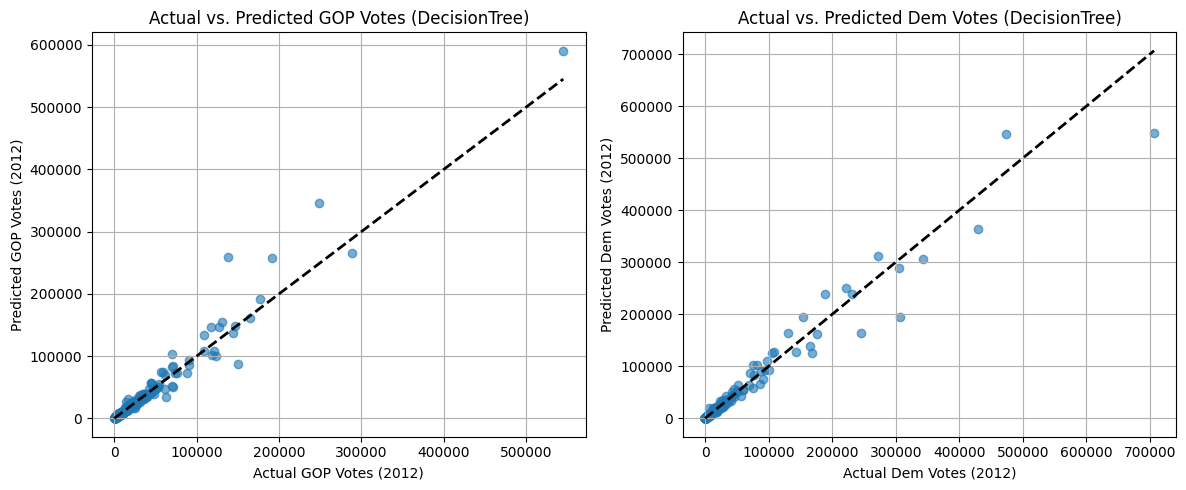

Saving the classifier...


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLasso, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt

#Preprocessor Class
class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.numeric_features = None
        self.categorical_features = None
        self.preprocessor = None

    def fit(self, X, y=None):
        # Identify numeric and categorical features
        self.numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
        self.categorical_features = ['state_abbr']  # Modify if there are more categorical features

        #Define the transformers for preprocessing
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('fill_numeric_empty_data', SimpleImputer(strategy='mean'), self.numeric_features),
                ('categorical_feature_OneHotEncoding', OneHotEncoder(drop=None, handle_unknown='ignore'), self.categorical_features)
            ]
        )
        
        
        self.preprocessor.fit(X)
        return self

    def transform(self, X):
        return self.preprocessor.transform(X)

# Load the data
data = pd.read_csv('vote16_regression.csv')

# Choose features and target
X = data.drop(columns=['gop', 'dem'])  # Features
y = data[['gop', 'dem']]  # Targets

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', CustomPreprocessor()),
    ('scaler', StandardScaler()), #Scaling is not necessary for Tree based models! 
    #Decision Tree works EXTREMELY WELL, random_state = 42
    ('model', DecisionTreeRegressor(random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model 
mse_gop = mean_squared_error(y_test['gop'], y_pred[:, 0])
rmse_gop = np.sqrt(mse_gop)
r2_gop = r2_score(y_test['gop'], y_pred[:, 0])

mse_dem = mean_squared_error(y_test['dem'], y_pred[:, 1])
rmse_dem = np.sqrt(mse_dem)
r2_dem = r2_score(y_test['dem'], y_pred[:, 1])

print("DecisionTreeRegressor Results for GOP Votes")
print(f'Root Mean Squared Error: {rmse_gop}')
print(f'R-squared: {r2_gop}')

print("\nDecisionTreeRegressor Results for Democratic Votes")
print(f'Root Mean Squared Error: {rmse_dem}')
print(f'R-squared: {r2_dem}')

# Visualize predictions for both targets
plt.figure(figsize=(12, 5))

# Plot for GOP
plt.subplot(1, 2, 1)
plt.scatter(y_test['gop'], y_pred[:, 0], alpha=0.6)
plt.plot([y_test['gop'].min(), y_test['gop'].max()],
         [y_test['gop'].min(), y_test['gop'].max()], 'k--', lw=2)
plt.title('Actual vs. Predicted GOP Votes (DecisionTree)')
plt.xlabel('Actual GOP Votes (2012)')
plt.ylabel('Predicted GOP Votes (2012)')
plt.grid()

# Plot DEM
plt.subplot(1, 2, 2)
plt.scatter(y_test['dem'], y_pred[:, 1], alpha=0.6)
plt.plot([y_test['dem'].min(), y_test['dem'].max()],
         [y_test['dem'].min(), y_test['dem'].max()], 'k--', lw=2)
plt.title('Actual vs. Predicted Dem Votes (DecisionTree)')
plt.xlabel('Actual Dem Votes (2012)')
plt.ylabel('Predicted Dem Votes (2012)')
plt.grid()

#DataFrame with gop and dem votes
results_df = pd.DataFrame({
    'Actual GOP Votes': y_test['gop'],
    'Predicted GOP Votes': y_pred[:, 0],
    'Actual Dem Votes': y_test['dem'],
    'Predicted Dem Votes': y_pred[:, 1]
})

# Print the Dataframe of results
print(results_df.reset_index(drop=True))




plt.tight_layout()
plt.show()
import joblib
import dill
# Saving Regressor
print('Saving the regressor...')
with open('vote16_pipeline_reg.dill', 'wb') as file:
    dill.dump(pipeline, file)

# Load the pipeline using dill
with open('vote16_pipeline_reg.dill', 'rb') as file:
    loaded_pipeline = dill.load(file)

#print('Done')
#print('Saving the classifier...')
#joblib.dump(pipeline, 'vote16_pipeline_reg.pkl')
#loaded_pipeline = joblib.load('vote16_pipeline_reg.pkl')
#print('Done')



Discussion of Results:

From the above results, the model performs well for joint attributes. Strangely, the individual 'dem' and 'gop' predictions differ from their own respective, individual models. In fact, for the 'dem' votes, the performance is better and the votes are more accurately predicted. 

A potential reason for this is because of the highly correlated dataset, it may be natural for gop and dem to already be correlated features. When they are allowed to be trained together for the tree splits, perhaps more information gain may be obtained when observing how a change in one target feature impacts the other target feature. I would be interested in doing this experiment again with a less correlated dataset, and much more, target features that don't share some type of correlation. 



Final Code: Puts preprocessing into Pipeline, saves the model. A quick note, the drop and target columns need to be manually changed. Every other preprocessing step is handled with the Pipeline. Scaling is optional.

A last comment about the model, convergence may be more possible with much more iteration or changing the tolerance level for what is an acceptable amount of convergence. However, as LASSO innately tries to be a simpler model, this may also be remedied with changing the alpha hyperparemter, or even looking more closely at feature engineering to reduce the VIF in the data set. Backwards elimination can be used to help get rid of weak features. 

# What to submit

1. This Jupyter notebook, filled out with code that when run will produce a working classifer with all necessary preprocessing.
    * You should use your final hyperparameter values in the call to the classifier's constructor.
2. If you get the pipeline working, the resulting <code>.pkl</code> file as follows.